In [1]:
import pickle
import numpy as np
from sklearn import metrics
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
with open('data/eval_preds.pickle', 'rb') as f:
    eval_preds = pickle.load(f)

len(eval_preds)

100

In [3]:
with open('data/eval_labels.pickle', 'rb') as f:
    eval_labels = pickle.load(f)

len(eval_labels)

100

In [4]:
with open('data/eval_preds_masked.pickle', 'rb') as f:
    eval_preds_iobe_consistency = pickle.load(f)

len(eval_preds_iobe_consistency)

100

In [5]:
unique_tags = sorted(set(tag for doc in eval_labels + eval_preds for tag in doc))
unique_tags

['B-LOC',
 'B-ORG',
 'B-PESSOA',
 'B-PUB',
 'I-LOC',
 'I-ORG',
 'I-PESSOA',
 'I-PUB',
 'O']

In [6]:
for item in eval_labels:
    for tag_index in range(1, len(item)):
        if item[tag_index-1][:1] == 'B' and item[tag_index][:1] == 'O':
            print(item[tag_index-1:tag_index+1])
            break

['B-LOC', 'O']
['B-LOC', 'O']
['B-ORG', 'O']
['B-PUB', 'O']
['B-PUB', 'O']
['B-PUB', 'O']
['B-PUB', 'O']
['B-ORG', 'O']
['B-LOC', 'O']
['B-PUB', 'O']
['B-LOC', 'O']
['B-PUB', 'O']
['B-ORG', 'O']
['B-PUB', 'O']
['B-ORG', 'O']
['B-PESSOA', 'O']
['B-LOC', 'O']
['B-PESSOA', 'O']
['B-PUB', 'O']
['B-LOC', 'O']
['B-ORG', 'O']
['B-PUB', 'O']
['B-LOC', 'O']
['B-PESSOA', 'O']
['B-PUB', 'O']
['B-PUB', 'O']
['B-ORG', 'O']
['B-PESSOA', 'O']
['B-PUB', 'O']
['B-LOC', 'O']
['B-LOC', 'O']
['B-PUB', 'O']
['B-ORG', 'O']
['B-LOC', 'O']
['B-PUB', 'O']
['B-ORG', 'O']
['B-PUB', 'O']
['B-PUB', 'O']
['B-LOC', 'O']
['B-PUB', 'O']
['B-PUB', 'O']
['B-PUB', 'O']
['B-ORG', 'O']
['B-PUB', 'O']
['B-LOC', 'O']
['B-PUB', 'O']
['B-PUB', 'O']
['B-PUB', 'O']
['B-PESSOA', 'O']
['B-PESSOA', 'O']
['B-LOC', 'O']
['B-LOC', 'O']
['B-PESSOA', 'O']
['B-PESSOA', 'O']
['B-PUB', 'O']
['B-ORG', 'O']
['B-PESSOA', 'O']
['B-PUB', 'O']
['B-PUB', 'O']
['B-PESSOA', 'O']
['B-PUB', 'O']
['B-PUB', 'O']
['B-ORG', 'O']
['B-LOC', 'O']
['B-LOC', 

In [7]:
list(range(4)) + [11]

[0, 1, 2, 3, 11]

d:\ProgramData\Anaconda3\envs\ner-unb\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=['B-LOC', 'B-ORG', 'B-PESSOA', 'B-PUB', 'I-LOC', 'I-ORG', 'I-PESSOA', 'I-PUB', 'O'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


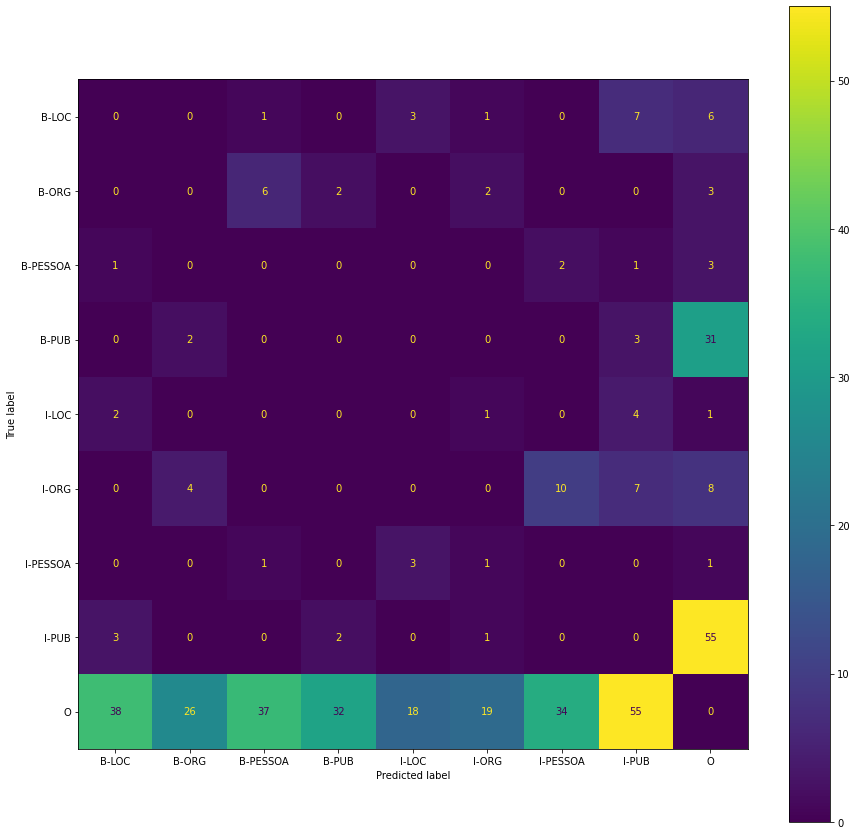

In [8]:
cm = metrics.confusion_matrix(y_true=np.hstack(eval_labels), y_pred=np.hstack(eval_preds), labels=unique_tags, normalize=None)
# cm *= 100
for i in range(len(cm)):
    cm[i][i] = 0
#     print(cm[i] / np.sum(cm[i]), np.sum(cm[i]))

# index_filter = list(range(4)) + [11]
cmp = metrics.ConfusionMatrixDisplay(cm, unique_tags)
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax)

d:\ProgramData\Anaconda3\envs\ner-unb\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=['B-LOC', 'B-ORG', 'B-PESSOA', 'B-PUB', 'I-LOC', 'I-ORG', 'I-PESSOA', 'I-PUB', 'O'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


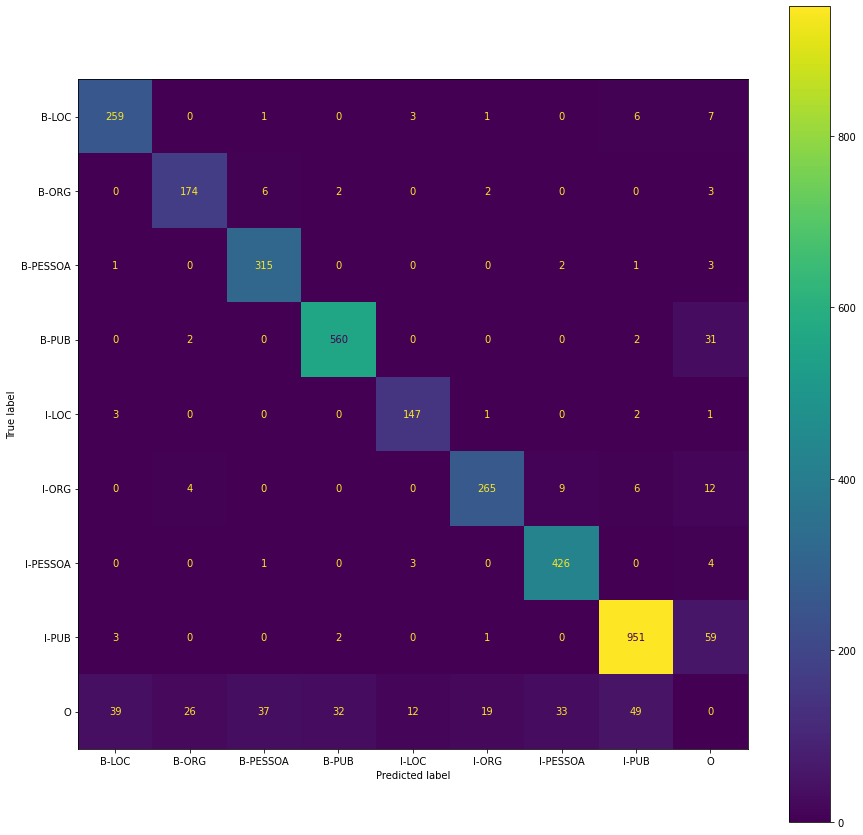

In [9]:
cm = metrics.confusion_matrix(np.hstack(eval_labels), np.hstack(eval_preds_iobe_consistency), 
                              labels=unique_tags, normalize=None)
# cm *= 100
# for i in range(len(cm)):
#     cm[i][i] = 0
cm[-1][-1] = 0
cmp = metrics.ConfusionMatrixDisplay(cm, unique_tags)
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax)

In [10]:
np.sum(cm[0]), cm[0]

(277, array([259,   0,   1,   0,   3,   1,   0,   6,   7], dtype=int64))